# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}{city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = time.gmtime(city_weather['dt'])
        city_date = time.strftime("%Y-%m-%d %H:%M:%S", city_date)

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | codrington
Processing Record 2 of Set 1 | isoka
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | klyuchi
Processing Record 6 of Set 1 | carnarvon
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | labrador city
Processing Record 10 of Set 1 | arraial do cabo
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | urucara
Processing Record 13 of Set 1 | udachny
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | qashyr
Processing Record 17 of Set 1 | tura
Processing Record 18 of Set 1 | taiohae
City not found. Skipping...
Processing Record 19 of Set 1 | olonkinbyen
Processing Record 20 of Set 1 | west island
Processing Record 21 of Set 1 | vila franca do campo
Processing Record 2

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,codrington,-38.2667,141.9667,10.01,99,78,1.63,AU,2023-11-07 19:00:35
1,isoka,-10.1606,32.6335,21.46,69,100,0.33,ZM,2023-11-07 19:00:38
2,puerto natales,-51.7236,-72.4875,10.25,53,75,10.29,CL,2023-11-07 19:00:40
3,yellowknife,62.4560,-114.3525,-4.77,97,100,3.09,CA,2023-11-07 19:00:43
4,klyuchi,52.2667,79.1667,-1.89,77,69,2.14,RU,2023-11-07 19:00:45


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,codrington,-38.2667,141.9667,10.01,99,78,1.63,AU,2023-11-07 19:00:35
1,isoka,-10.1606,32.6335,21.46,69,100,0.33,ZM,2023-11-07 19:00:38
2,puerto natales,-51.7236,-72.4875,10.25,53,75,10.29,CL,2023-11-07 19:00:40
3,yellowknife,62.4560,-114.3525,-4.77,97,100,3.09,CA,2023-11-07 19:00:43
4,klyuchi,52.2667,79.1667,-1.89,77,69,2.14,RU,2023-11-07 19:00:45


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

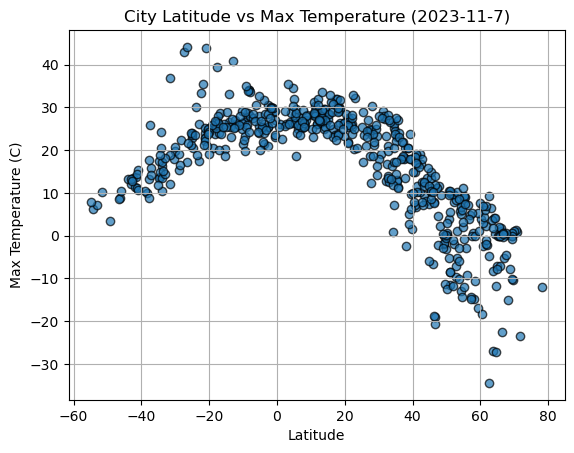

In [77]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
plt.scatter(x_values, city_data_df['Max Temp'], marker='o', alpha=0.7, edgecolors='0')

# Incorporate the other graph properties
plt.title('City Latitude vs Max Temperature (2023-11-7)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

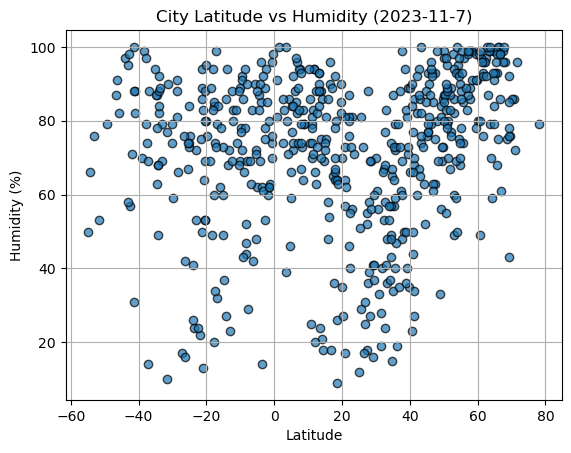

In [78]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x_values, city_data_df['Humidity'], marker='o', alpha=0.7, edgecolors='0')

# Incorporate the other graph properties
plt.title('City Latitude vs Humidity (2023-11-7)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

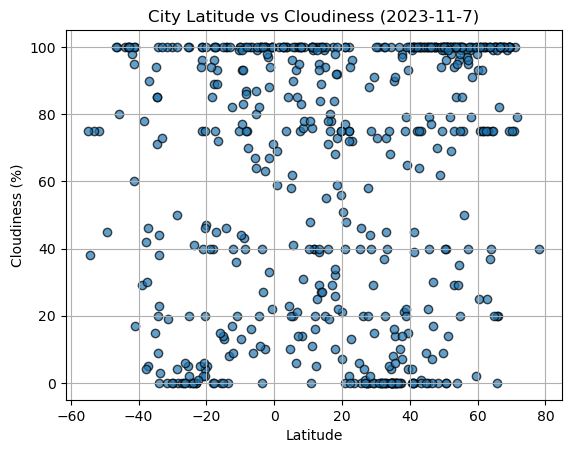

In [79]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x_values, city_data_df['Cloudiness'], marker='o', alpha=0.7, edgecolors='0')

# Incorporate the other graph properties
plt.title('City Latitude vs Cloudiness (2023-11-7)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

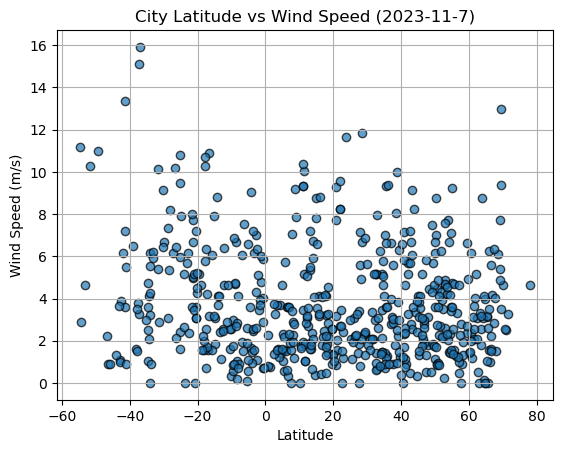

In [80]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(x_values, city_data_df['Wind Speed'], marker='o', alpha=0.7, edgecolors='0')

# Incorporate the other graph properties
plt.title('City Latitude vs Wind Speed (2023-11-7)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [35]:
# Define a function to create Linear Regression plots
y_values = city_data_df[['Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']].astype(float)
regression_results = {}
for values in y_values:
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values[values])
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    regression_results[values] = {
        'slope': slope,
        'intercept': intercept,
        'rvalue': rvalue,
        'pvalue': pvalue,
        'stderr': stderr,
        'regress_values': regress_values,
        'line_eq': line_eq
    }

regression_results

{'Max Temp': {'slope': -0.2483982601922413,
  'intercept': 21.054970009330617,
  'rvalue': -0.608860933479124,
  'pvalue': 1.3087918793350956e-58,
  'stderr': 0.013639583022532382,
  'regress_values': City_ID
  0      30.560352
  1      23.578845
  2      33.903022
  3       5.541008
  4       8.072013
           ...    
  560    21.891252
  561    18.006974
  562    14.435156
  563    21.557380
  564    28.146740
  Name: Lat, Length: 565, dtype: float64,
  'line_eq': 'y = -0.25x + 21.05'},
 'Humidity': {'slope': 0.10567992325147645,
  'intercept': 70.02455922219798,
  'rvalue': 0.1584949654499811,
  'pvalue': 0.0001549639809385829,
  'stderr': 0.027745864112569657,
  'regress_values': City_ID
  0      65.980537
  1      68.950788
  2      64.558413
  3      76.624905
  4      75.548100
           ...    
  560    69.668767
  561    71.321315
  562    72.840929
  563    69.810811
  564    67.007397
  Name: Lat, Length: 565, dtype: float64,
  'line_eq': 'y = 0.11x + 70.02'},
 'Cloudines

In [36]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,yellowknife,62.4560,-114.3525,-4.77,97,100,3.09,CA,2023-11-07 19:00:43
4,klyuchi,52.2667,79.1667,-1.89,77,69,2.14,RU,2023-11-07 19:00:45
7,georgetown,5.4112,100.3354,28.30,92,20,1.54,MY,2023-11-07 19:00:18
8,labrador city,52.9463,-66.9114,-7.05,86,100,4.63,CA,2023-11-07 19:00:19
12,udachny,66.4167,112.4000,-22.45,100,82,0.99,RU,2023-11-07 19:00:56


In [37]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,codrington,-38.2667,141.9667,10.01,99,78,1.63,AU,2023-11-07 19:00:35
1,isoka,-10.1606,32.6335,21.46,69,100,0.33,ZM,2023-11-07 19:00:38
2,puerto natales,-51.7236,-72.4875,10.25,53,75,10.29,CL,2023-11-07 19:00:40
5,carnarvon,-24.8667,113.6333,20.53,76,0,7.90,AU,2023-11-07 19:00:21
6,port elizabeth,-33.9180,25.5701,16.29,82,0,6.17,ZA,2023-11-07 19:00:49


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.7227540799517612


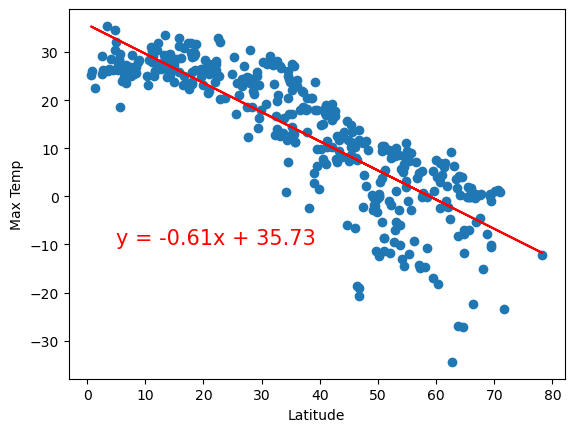

In [56]:
# Linear regression on Northern Hemisphere
northern_xvalues = northern_hemi_df["Lat"]
northern_y_columns = northern_hemi_df[['Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']].astype(float)
northern_regression_results = {}
for column in northern_y_columns:
    northern_yvalues = northern_hemi_df[column].astype(float)
    
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(northern_xvalues, northern_yvalues)
    northern_regress_values = slope * northern_xvalues + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    northern_regression_results[column] = {
        'slope': slope,
        'intercept': intercept,
        'rvalue': rvalue,
        'pvalue': pvalue,
        'stderr': stderr,
        'regress_values': northern_regress_values,
        'line_eq': line_eq
    }
    
# Create a scatter plot for each column
plt.scatter(northern_xvalues, northern_hemi_df['Max Temp'])
    
# Plot regression line for each column
plt.plot(northern_xvalues, northern_regression_results['Max Temp']['regress_values'], color = "red")
    
# Add the line equation as an annotation
plt.annotate(northern_regression_results['Max Temp']['line_eq'], (5, -10), fontsize=15, color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r squared value
print(f"R squared: {northern_regression_results['Max Temp']['rvalue']**2}")

# Show plot
plt.show()

R squared: 0.5006399170317644


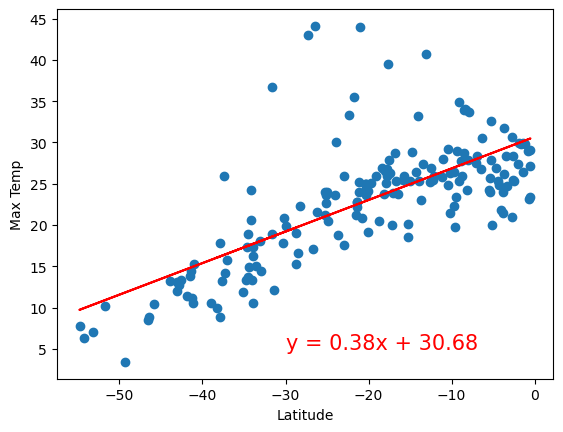

In [62]:
# Linear regression on Southern Hemisphere
southern_xvalues = southern_hemi_df["Lat"]
southern_y_columns = southern_hemi_df[['Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']].astype(float)
southern_regression_results = {}
for column in southern_y_columns:
    southern_yvalues = southern_hemi_df[column].astype(float)
    
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(southern_xvalues, southern_yvalues)
    southern_regress_values = slope * southern_xvalues + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    southern_regression_results[column] = {
        'slope': slope,
        'intercept': intercept,
        'rvalue': rvalue,
        'pvalue': pvalue,
        'stderr': stderr,
        'regress_values': southern_regress_values,
        'line_eq': line_eq
    }
    
# Create a scatter plot for each column
plt.scatter(southern_xvalues, southern_hemi_df['Max Temp'])
    
# Plot regression line for each column
plt.plot(southern_xvalues, southern_regression_results['Max Temp']['regress_values'], color = "red")
    
# Add the line equation as an annotation
plt.annotate(southern_regression_results['Max Temp']['line_eq'], (-30, 5), fontsize=15, color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Print r squared value
print(f"R squared: {southern_regression_results['Max Temp']['rvalue']**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
- There is a strong negative correlation between latitude and max temp in the northern hemisphere, and a weaker but signficant positive correlation between latitude and temperature in the southern hemisphere. The outliers in northern hemisphere tend to be cold temps at higher latitudes, and the outliers in the southern hemisphere tend to be higher temps at lower latitudes. The highest max temps occur in the southern hemisphere, and the lowest by far occur in the northern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.07964511455090208


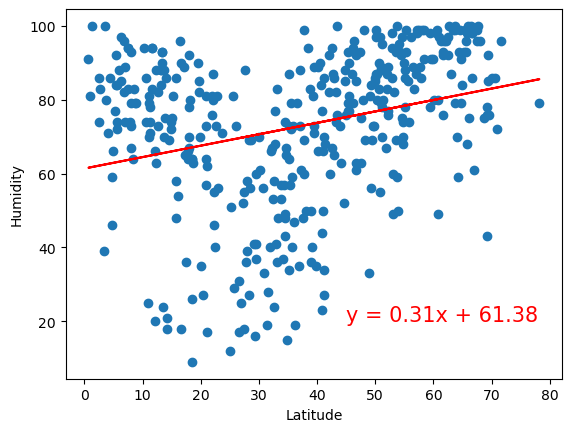

In [61]:
# Northern Hemisphere
# Create a scatter plot for each column
plt.scatter(northern_xvalues, northern_hemi_df['Humidity'])
    
# Plot regression line for each column
plt.plot(northern_xvalues, northern_regression_results['Humidity']['regress_values'], color = "red")
    
# Add the line equation as an annotation
plt.annotate(northern_regression_results['Humidity']['line_eq'], (45, 20), fontsize=15, color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r squared value
print(f"R squared: {northern_regression_results['Humidity']['rvalue']**2}")

# Show plot
plt.show()

R squared: 0.0007756557174567235


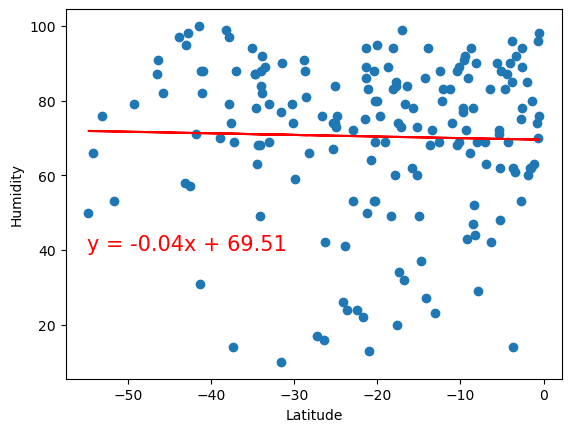

In [65]:
# Southern Hemisphere
# Create a scatter plot for each column
plt.scatter(southern_xvalues, southern_hemi_df['Humidity'])
    
# Plot regression line for each column
plt.plot(southern_xvalues, southern_regression_results['Humidity']['regress_values'], color = "red")
    
# Add the line equation as an annotation
plt.annotate(southern_regression_results['Humidity']['line_eq'], (-55, 40), fontsize=15, color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r squared value
print(f"R squared: {southern_regression_results['Humidity']['rvalue']**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
- There is no significant linear relationship between humidity and latitude in either hemisphere. I do wonder if you could fit a parabola to the northern hemisphere data that would be more descriptive. I don't see any sort of line that could fit the southern hemisphere data, which has an r-squared that's nearly zero.

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.041479335350315755


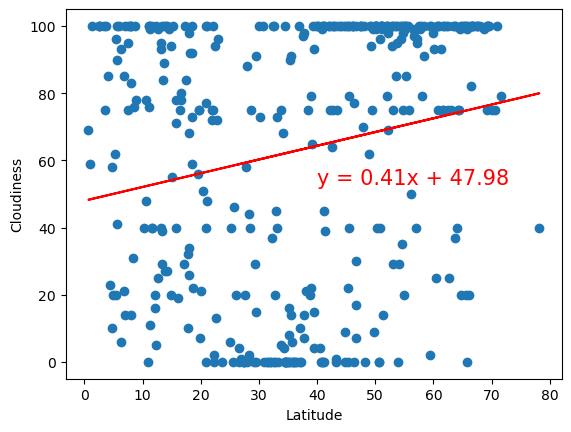

In [68]:
# Northern Hemisphere
# Create a scatter plot for each column
plt.scatter(northern_xvalues, northern_hemi_df['Cloudiness'])
    
# Plot regression line for each column
plt.plot(northern_xvalues, northern_regression_results['Cloudiness']['regress_values'], color = "red")
    
# Add the line equation as an annotation
plt.annotate(northern_regression_results['Cloudiness']['line_eq'], (40, 53), fontsize=15, color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r squared value
print(f"R squared: {northern_regression_results['Cloudiness']['rvalue']**2}")

# Show plot
plt.show()

R squared: 0.008957215333742495


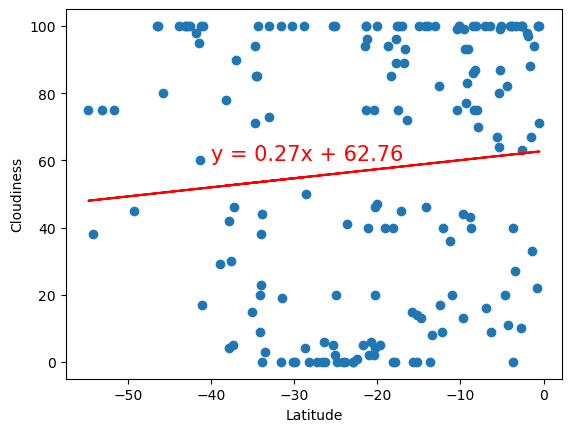

In [71]:
# Southern Hemisphere
# Create a scatter plot for each column
plt.scatter(southern_xvalues, southern_hemi_df['Cloudiness'])
    
# Plot regression line for each column
plt.plot(southern_xvalues, southern_regression_results['Cloudiness']['regress_values'], color = "red")
    
# Add the line equation as an annotation
plt.annotate(southern_regression_results['Cloudiness']['line_eq'], (-40, 60), fontsize=15, color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r squared value
print(f"R squared: {southern_regression_results['Cloudiness']['rvalue']**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
- There is no significant relationship between cloudiness and latitude. The number of max and min (100 & 0) values within the dataset do not lend themselves to linear regression.

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.0010376833736769487


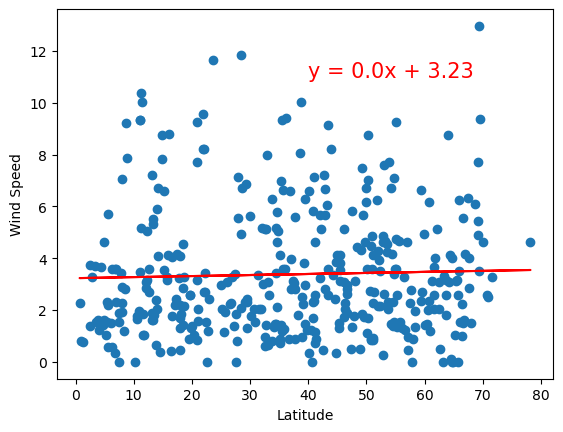

In [74]:
# Northern Hemisphere
# Create a scatter plot for each column
plt.scatter(northern_xvalues, northern_hemi_df['Wind Speed'])
    
# Plot regression line for each column
plt.plot(northern_xvalues, northern_regression_results['Wind Speed']['regress_values'], color = "red")
    
# Add the line equation as an annotation
plt.annotate(northern_regression_results['Wind Speed']['line_eq'], (40, 11), fontsize=15, color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r squared value
print(f"R squared: {northern_regression_results['Wind Speed']['rvalue']**2}")

# Show plot
plt.show()

R squared: 0.05127843649380129


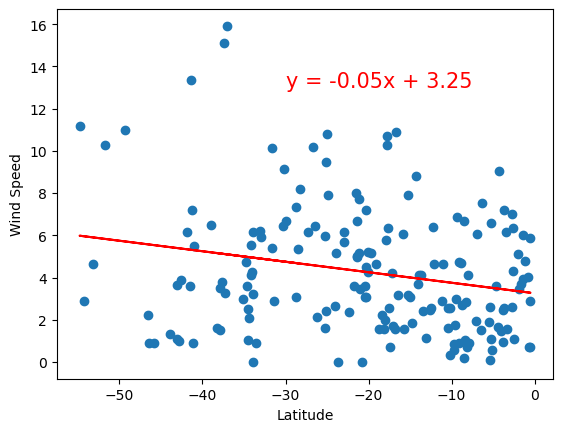

In [76]:
# Southern Hemisphere
# Create a scatter plot for each column
plt.scatter(southern_xvalues, southern_hemi_df['Wind Speed'])
    
# Plot regression line for each column
plt.plot(southern_xvalues, southern_regression_results['Wind Speed']['regress_values'], color = "red")
    
# Add the line equation as an annotation
plt.annotate(southern_regression_results['Wind Speed']['line_eq'], (-30, 13), fontsize=15, color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r squared value
print(f"R squared: {southern_regression_results['Wind Speed']['rvalue']**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
- There is no statistically significant relationship between latitude and wind speed. Perhaps an exponential decay line could fit the southern hemisphere data better but that is likely just sample variance. In the southern hemisphere the outliers are all at lower latitudes, but the outliers are more distributed across latitudes in the northern hemisphere. 